In [1]:
import numpy as np
from PIL import Image
import os
import sys
import cv2
from Otsu import Otsu
from CurveDetect import CurveDetect
from tools import delete_noise, show_prediction
import sys
sys.path.append("../main/")
from validation import validate
from Devide import Devide

In [ ]:
i = 0

In [ ]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer/"
COMPARE_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_0352//"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".")[0]
i += 1

original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")
compare_image = Image.open(COMPARE_FILE_ROOT + filename + ".png") 

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask) # green
compare_image_array = np.asarray(compare_image) # red
#print(original_image_array.shape)
#print(original_image_array)

dst = show_prediction(original_image_array, predicted_mask_array, compare_image_array)
dst

In [2]:
i = 0

2
fc22db33a2495f58f118bc182c0087e140df14ccb8dad51373e1a54381f683de.png
score:  0.49618419084513443
0.5 : 0.6701030927835051
0.55 : 0.6530612244897959
0.6 : 0.6530612244897959
0.65 : 0.6530612244897959
0.7 : 0.62
0.75 : 0.5728155339805825
0.8 : 0.44642857142857145
0.85 : 0.40869565217391307
0.9 : 0.24615384615384617
0.95 : 0.038461538461538464


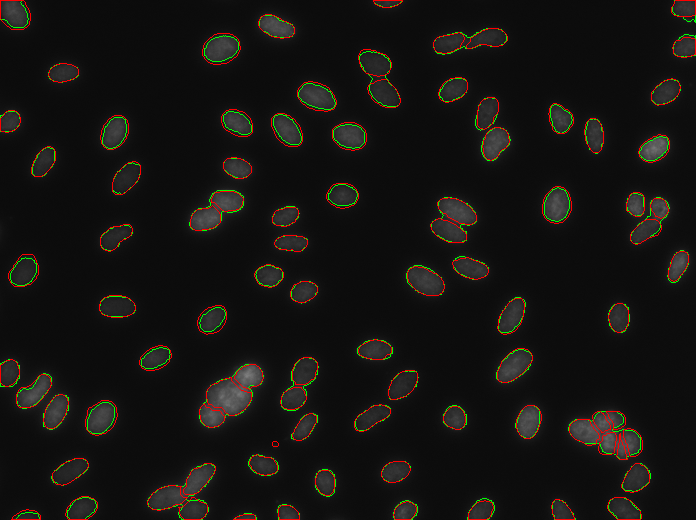

In [17]:
# validation画像の分析
TRAIN_FILE_ROOT_COLOR = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_color/"
TRAIN_FILE_ROOT_GRAY  = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_gray/"
VALIDATION_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val/"
TRAIN_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/"

print(i)
filenames = os.listdir(VALIDATION_FILE_ROOT)
filename = filenames[i]
print(filename)
i += 1

original_image =  Image.open(TRAIN_FILE_ROOT + '/images/' + filename)
predicted_mask = Image.open(VALIDATION_FILE_ROOT + filename )
gt_mask = Image.open(TRAIN_FILE_ROOT + 'masks/' + filename)
original_image_array = np.asarray(original_image)[:, :, :3].copy()  # なぜかcopyを入れないと動かない・・・
predicted_mask_array = np.asarray(predicted_mask)
gt_mask_array = np.asarray(gt_mask)

val, vs, _ = validate(predicted_mask_array, gt_mask_array)
threshold = np.linspace(0.5, 0.95, 10)
threshold = np.around(threshold, decimals=2)
print("score: ", val)
for v, thresh in zip(vs, threshold):
    print(thresh, ":", v)
    
dst = show_prediction(original_image_array, predicted_mask_array, gt_mask_array)
dst

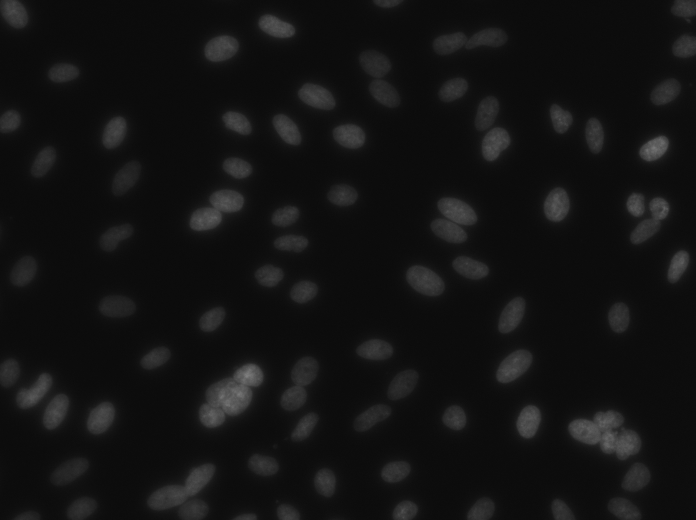

In [18]:
original_image

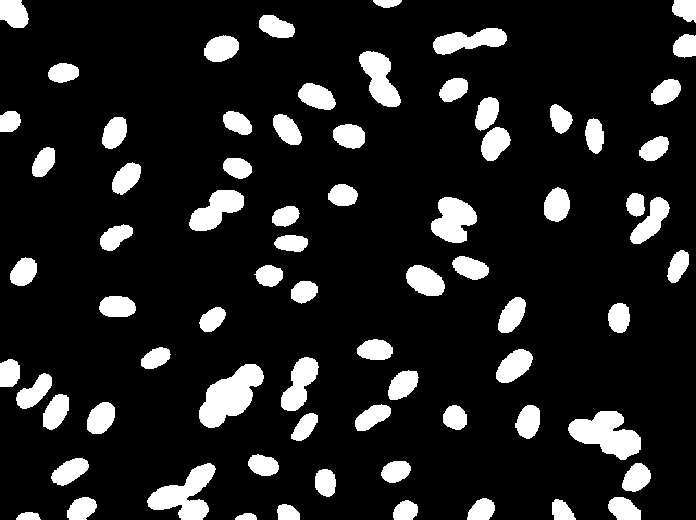

In [19]:
predicted_mask

In [20]:
tmp = Devide(original_image_array, predicted_mask_array)

In [21]:
tmp

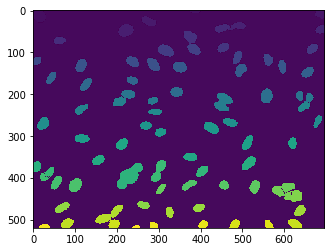

In [22]:
tmp.show()

In [25]:
tmp.data()

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  2,  2, ...,  4,  4, -1],
       [-1,  2,  2, ...,  4,  4, -1],
       ...,
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)